# READ IN ALL THE ZERO'S

In [1]:
# Read in the zero's
d0 = scan("Zl0d.dat", nlines=1000, n = 256000)
dim(d0)

NULL

In [2]:
# turn this into a matrix
mat_d0 = matrix(d0, 256, 1000)

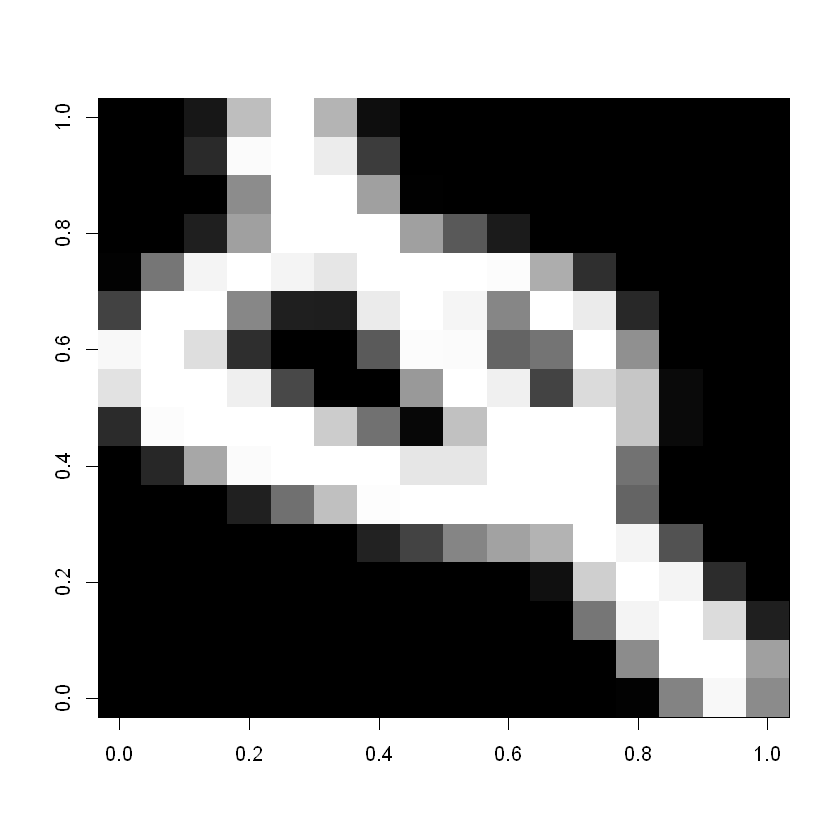

In [3]:
# Create an image of these 
x = matrix(mat_d0[,1],16,16)
image(x, col=gray(c(0:256)/256))

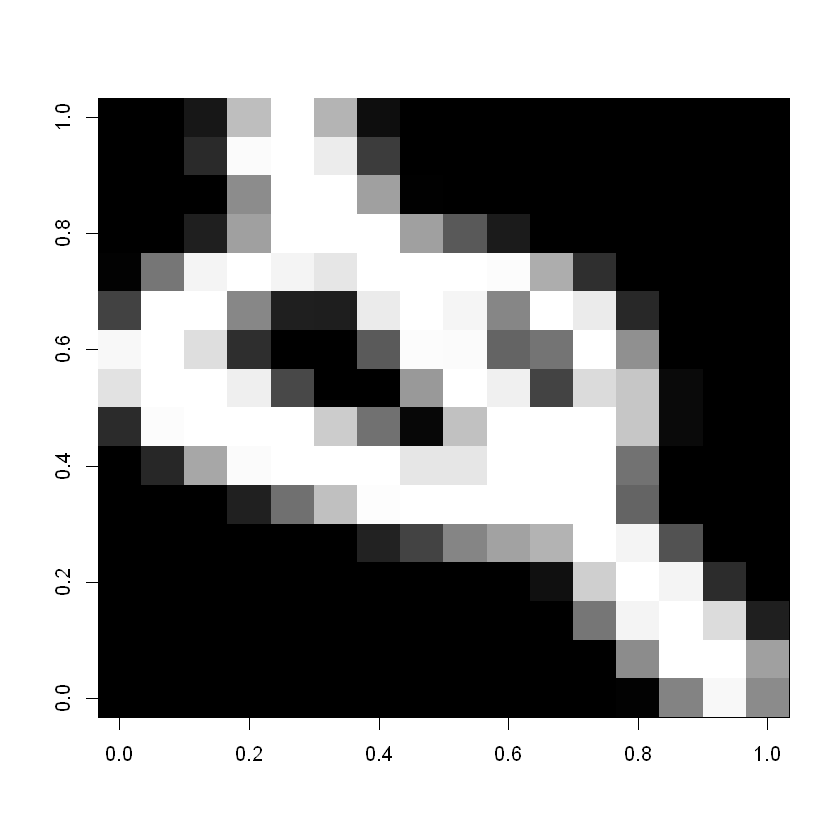

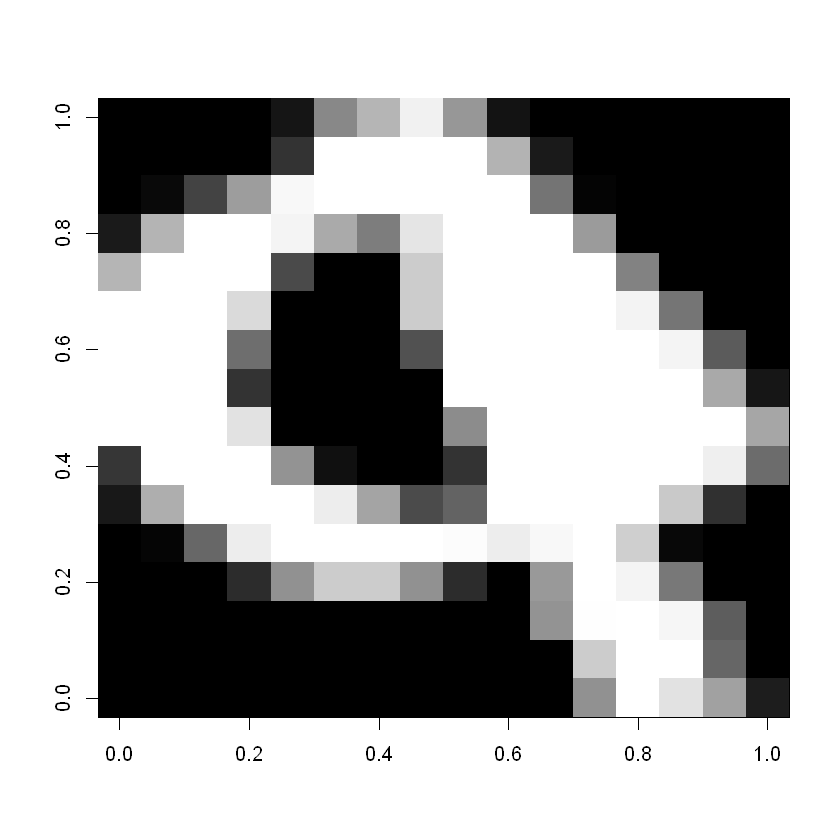

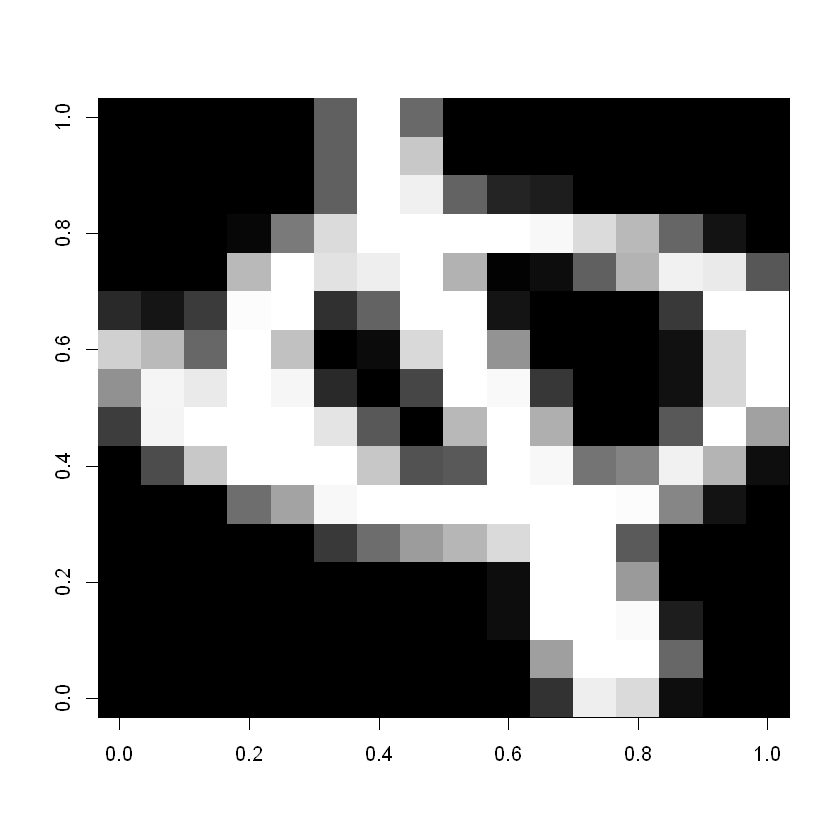

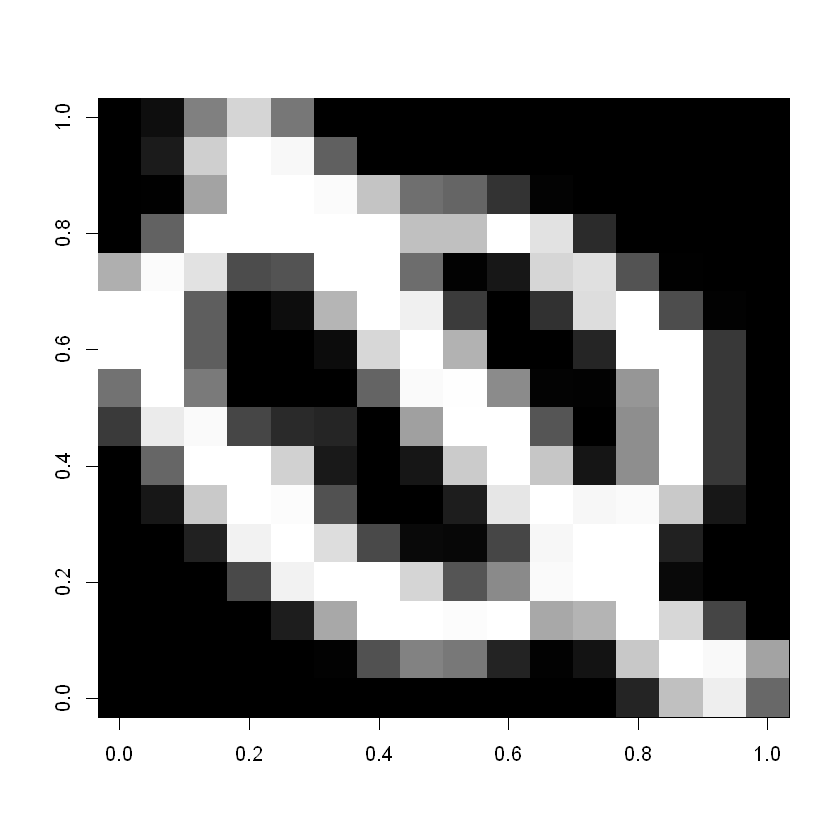

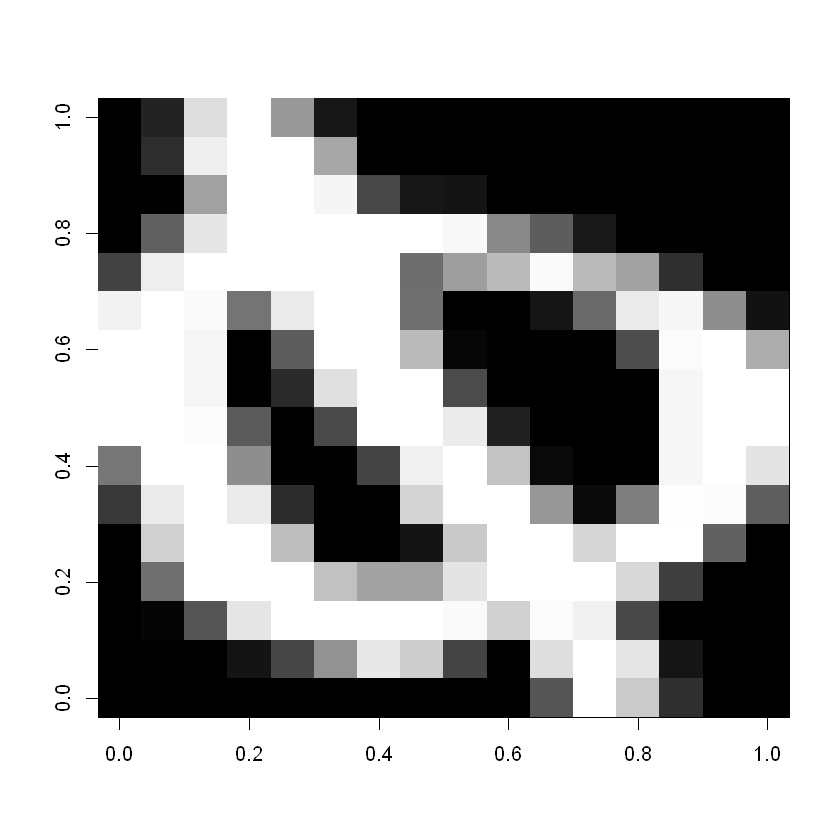

In [4]:
# Iterate through these images of zero's - press enter for new image
for (i in c(1:1000))
{
    x = matrix(mat_d0[,i],16,16)
    image(x, col=gray(c(0:256)/256))
    readline()
}

# READ IN ALL ONES'S

In [5]:
# Read in the ones
d1 = scan("Zl1d.dat", nlines=1000, n = 256000)
dim(d1)

NULL

In [6]:
# Create a matrix of these 1's
mat_d1 = matrix(d1, 256, 1000)

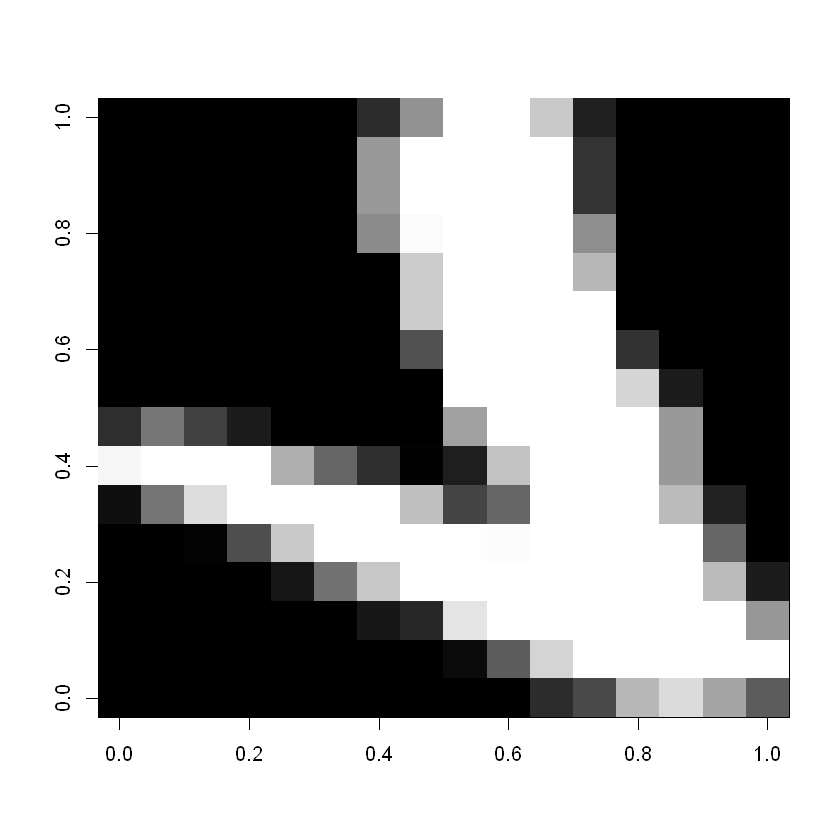

In [7]:
x = matrix(mat_d1[,1],16,16)
image(x, col=gray(c(0:256)/256))

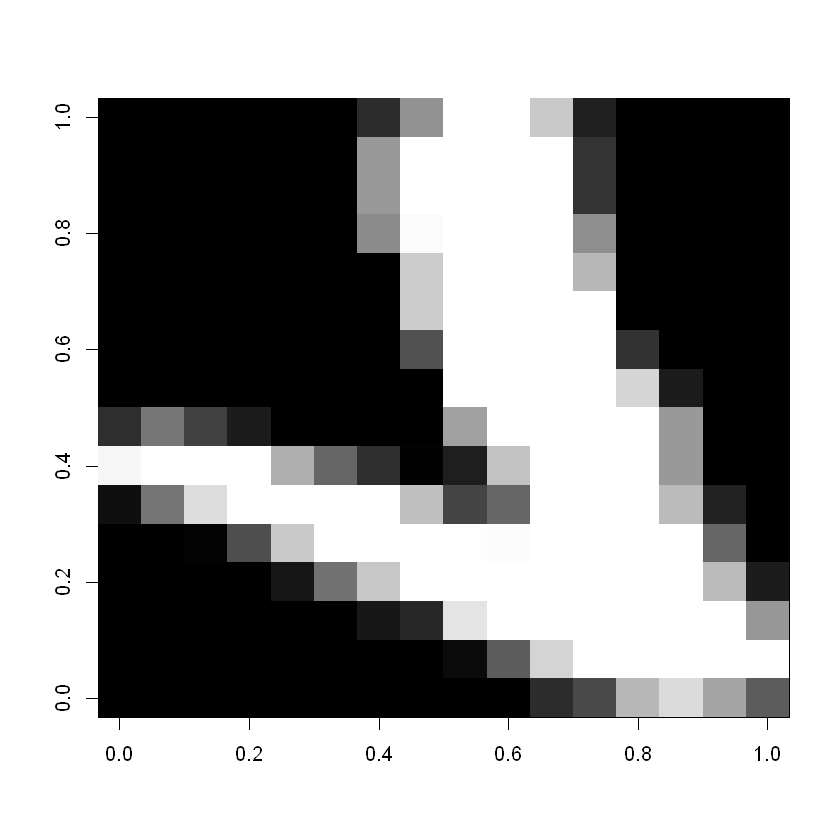

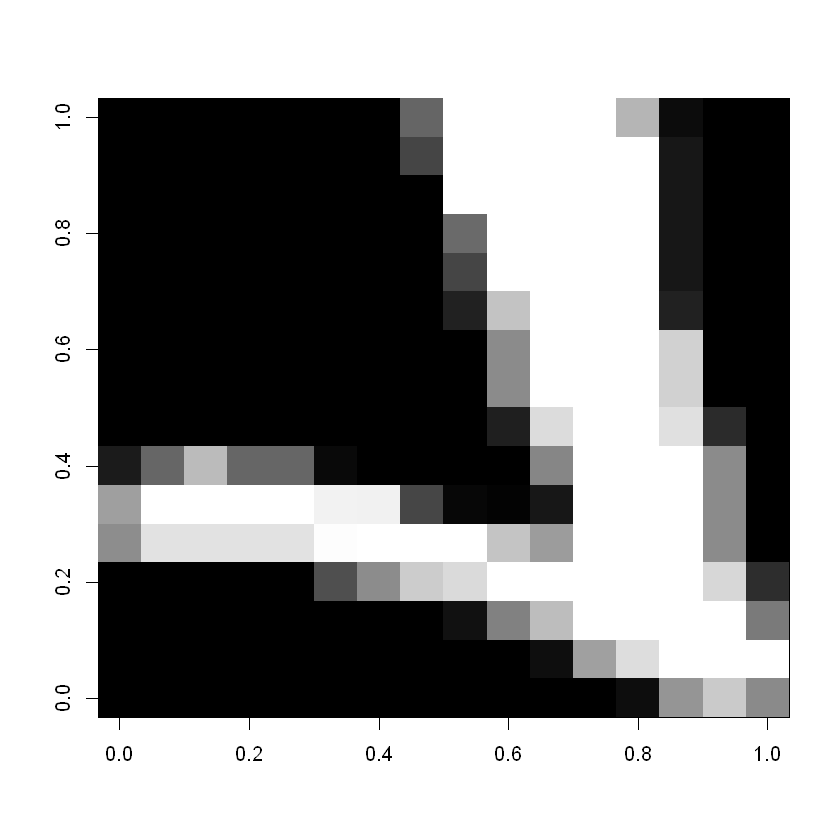

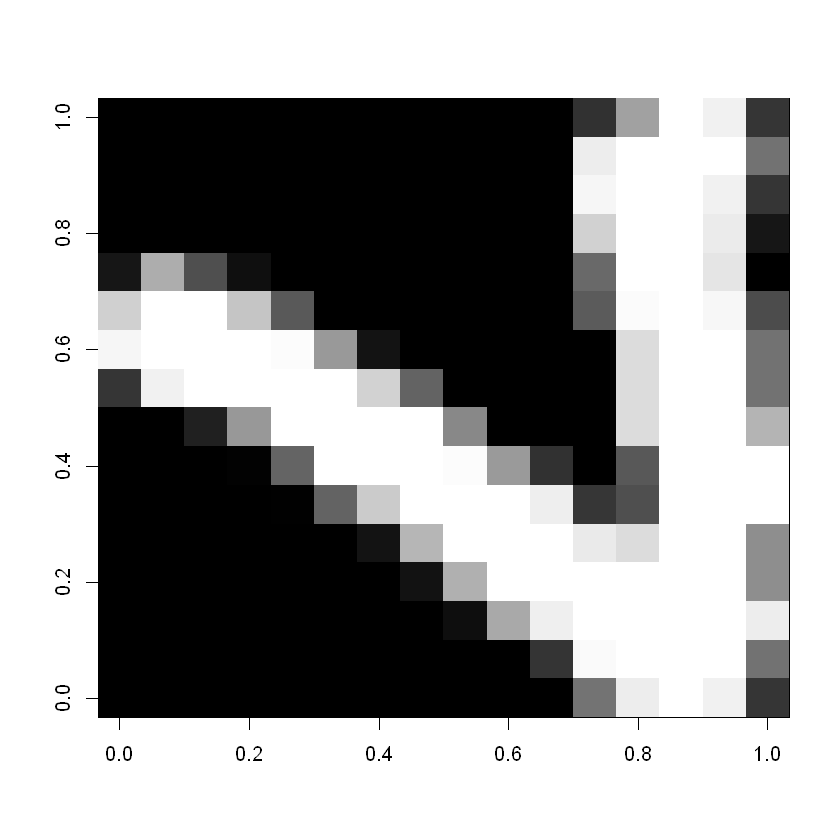

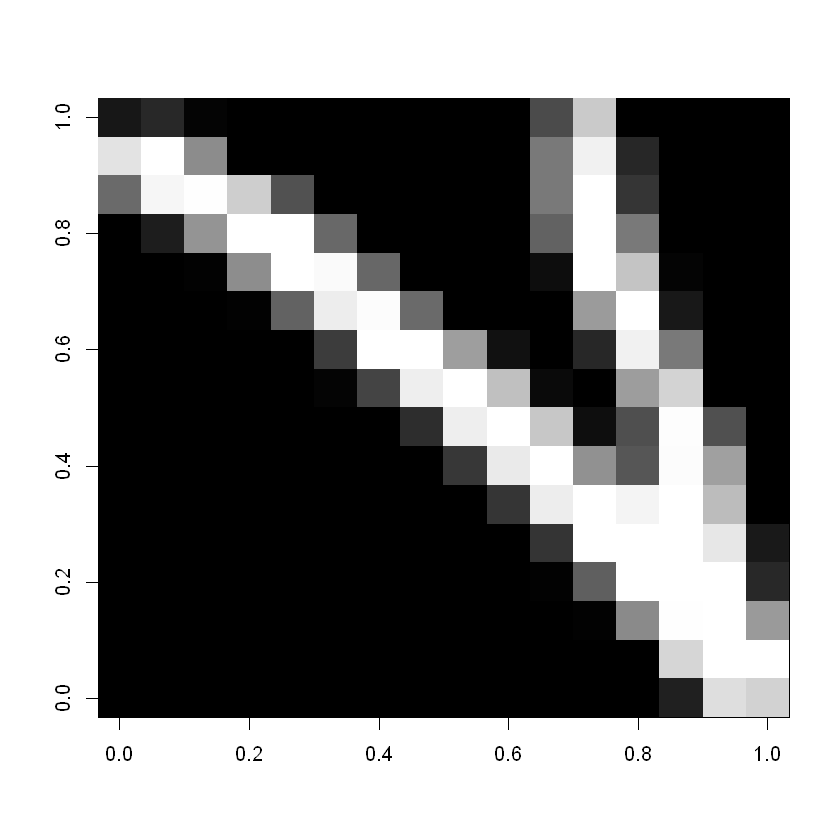

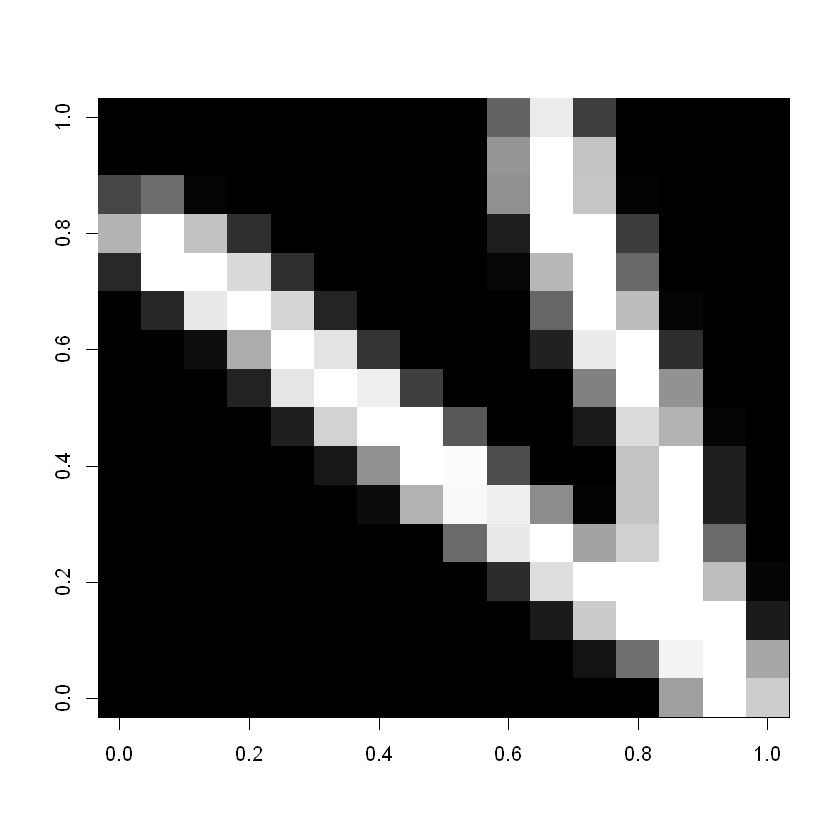

In [8]:
# Iterate through the images of these Ones
for (i in c(1:1000))
{
    x = matrix(mat_d1[,i],16,16)
    image(x, col=gray(c(0:256)/256))
    readline()
}

# COMBINING + PLOTTING DATA

In [9]:
# get the dimansions of these matricies
dim(mat_d0)
dim(mat_d1)

[1]  256 1000

[1]  256 1000

In [10]:
# Combine these matricies
d = cbind(mat_d0,mat_d1)
dim(d)

[1]  256 2000

In [11]:
# Transpose d
d = t(d)
dim(d)

[1] 2000  256

In [12]:
# get the variance of this
c = var(d)
dim(c)

[1] 256 256

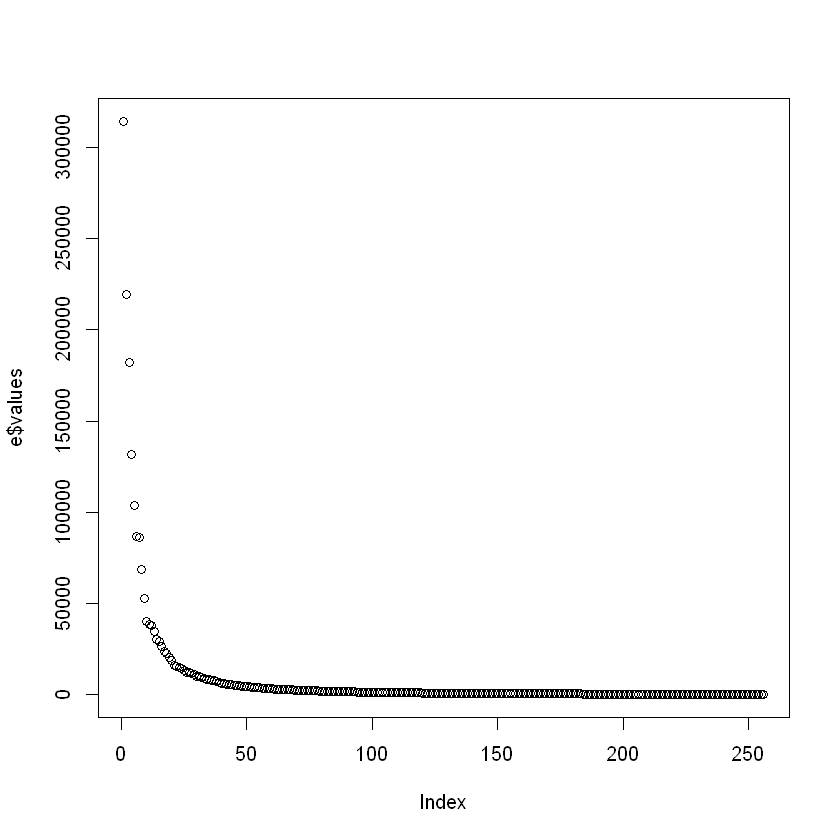

In [13]:
# Get & Plot the eigenvalues of (c)
e = eigen(c)
plot(e$values)

In [14]:
# create a matrix of the evectors for each digit image
p = d %*% e$vectors[, c(1:3)]
dim(p)

[1] 2000    3

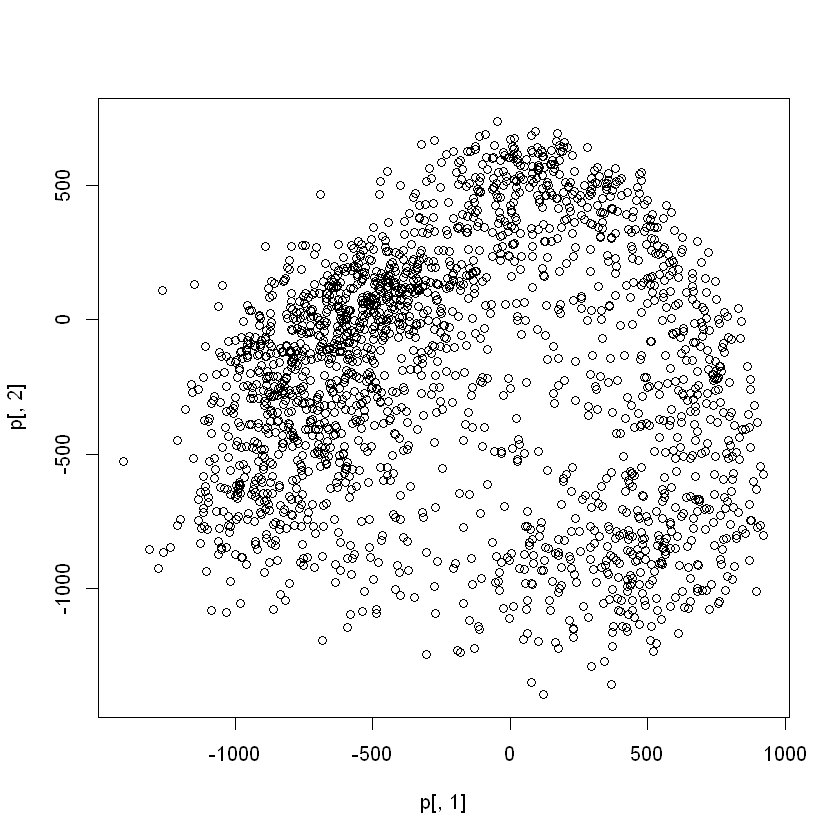

In [15]:
# Plot the point clouds
plot(p[,1], p[,2])

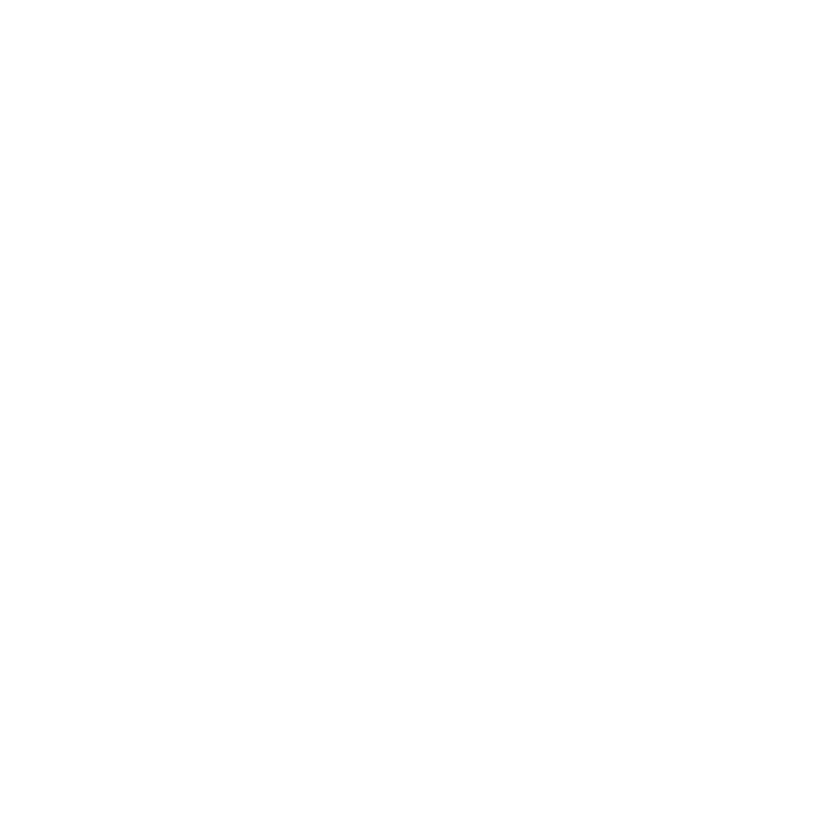

In [16]:
# Plot the zero's point cloud in red
plot.new()
points(p[1:1000,1],p[1:1000,2], col = "red")

# ROTATING POINT CLOUD

In [17]:
# Create the rotation angle
theta = 2* pi/1000

In [18]:
# Create the rotation matrix
rotation = matrix(c(cos(theta), sin(theta), -sin(theta), cos(theta)), 2,2)

In [19]:
# Set the zeros as one point cloud
a = t(p[1:1000,])

In [20]:
# Set the ones as one point cloud
b = t(p[1001:2000,])

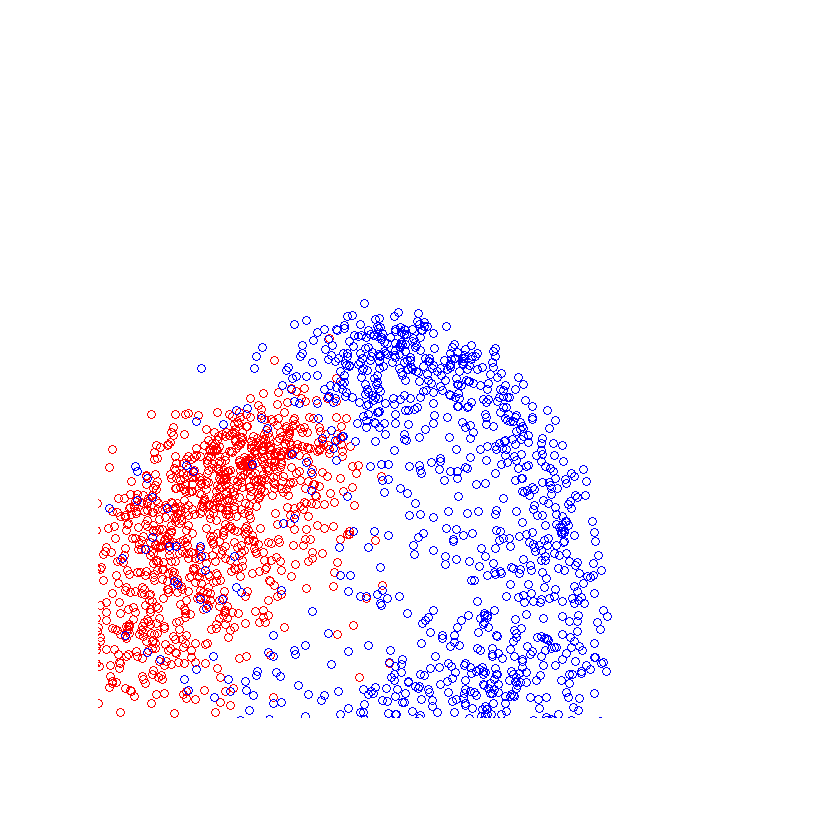

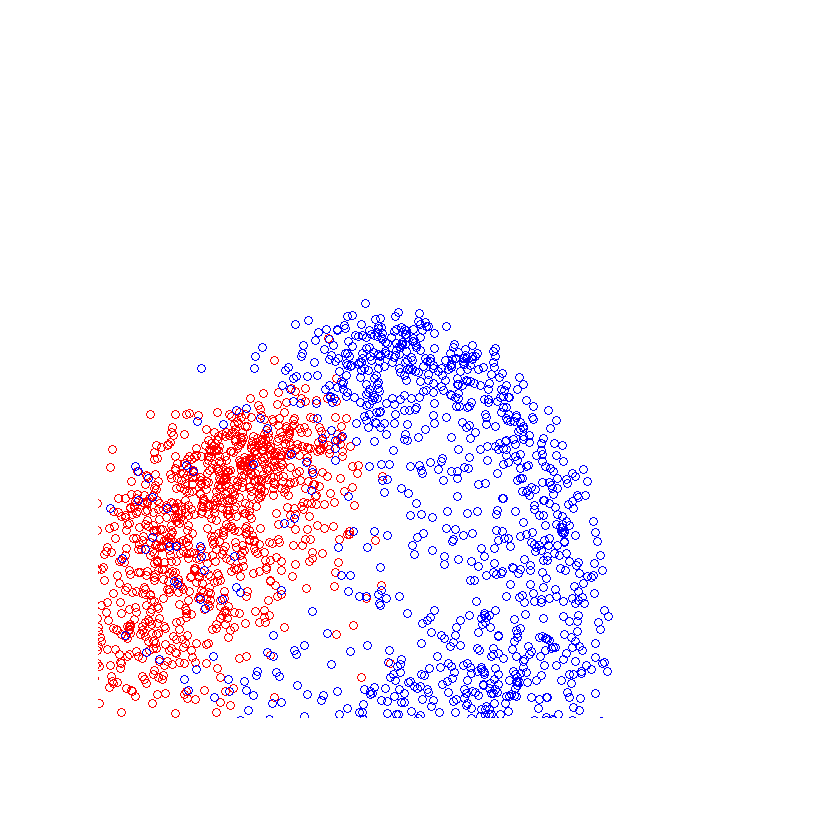

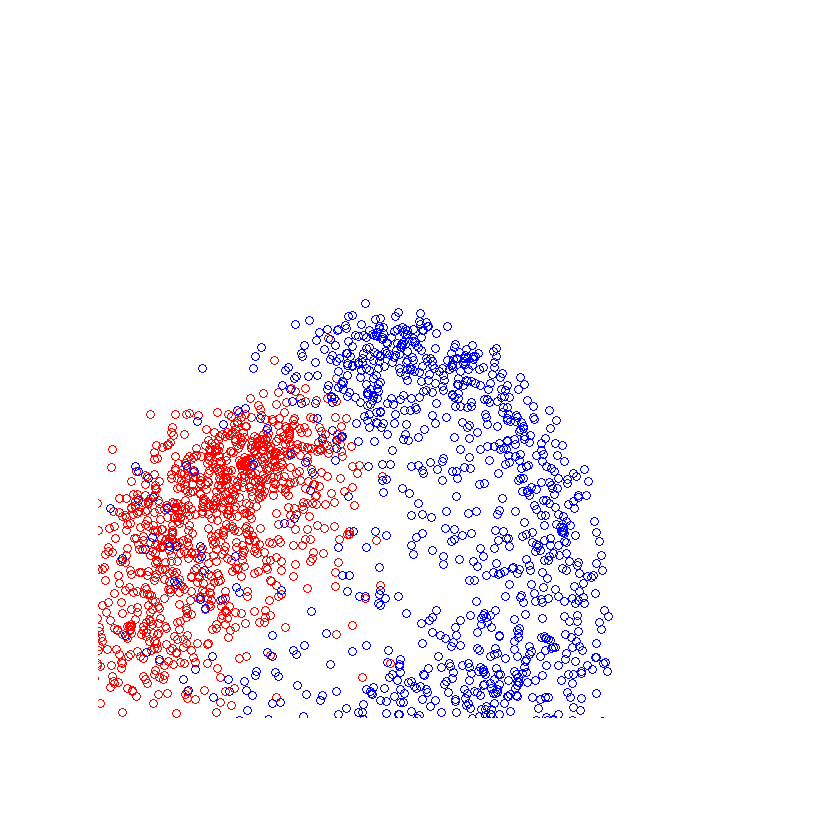

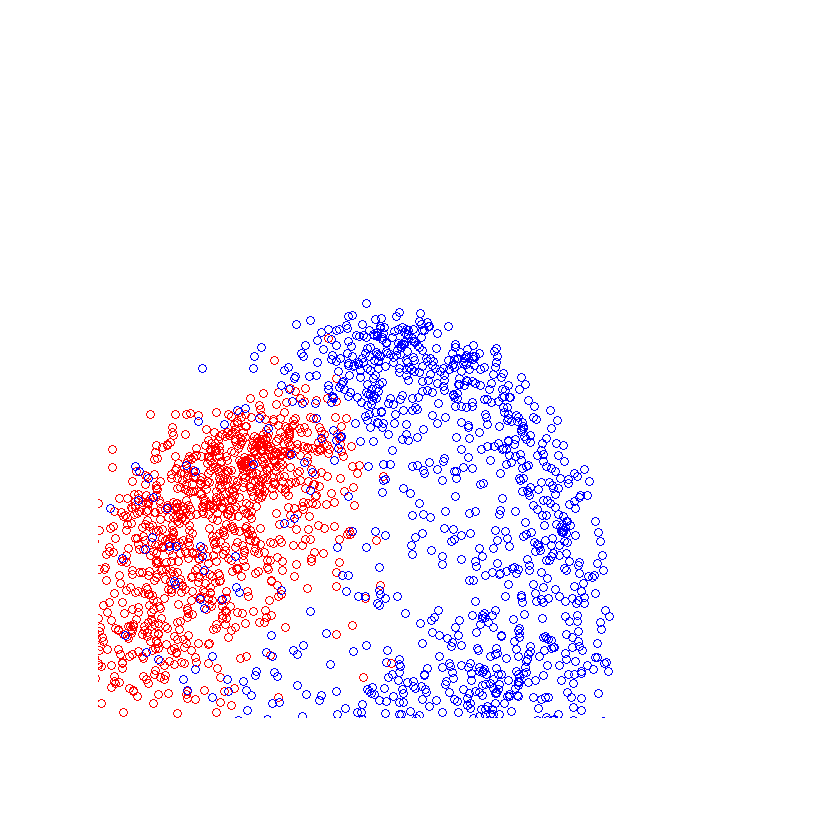

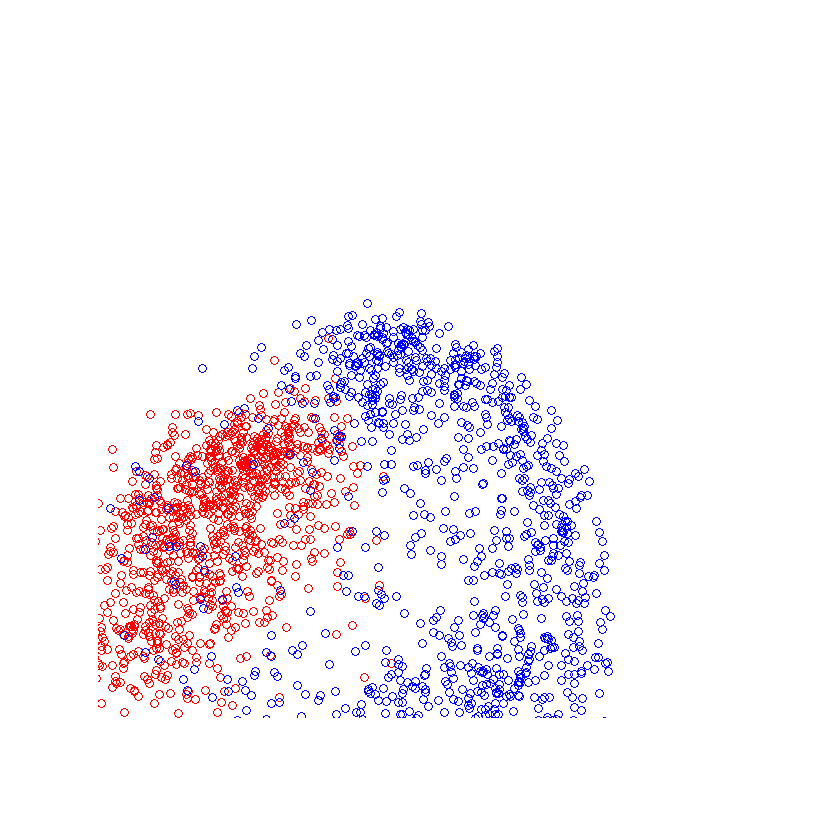

In [21]:
# Rotate the point clouds
for (i in c(1:100))
{
    plot.new()
    plot.window(xlim=c(-1000,1550), ylim = c(-900,1500))

    a[c(1,3),]= rotation %*% a[c(1,3),]
    b[c(1,3),]= rotation %*% b[c(1,3),]
    points(a[1,],a[2,],col='red')
    points(b[1,],b[2,],col='blue')
}

# LOCATING POINTS

In [22]:
# combine the point clouds
r = cbind(a,b)

In [23]:
# Identify 5 points in the cloud - doesn't work in jupyter notebook
group = identify(r[1,],r[2,],n=5)

ERROR: Error in identify.default(r[1, ], r[2, ], n = 5): plot.new has not been called yet


In [24]:
# Set the window that we want to put these point on
dev.set(3)

png 
  2

In [25]:
# Iterate through the identified points and put them on a diagram
for (i in group)
{
    z = matrix(as.numeric(d[i,]), 16, 16)
    image(c(1:16),c(1:16), z, col=gray(c(0:256)/256),xlab="X-LABEL", ylab= "Y-LABEL", mar=c(1,1,1,1))
    readline()
}

ERROR: Error in eval(expr, envir, enclos): object 'group' not found


In [26]:
group

ERROR: Error in eval(expr, envir, enclos): object 'group' not found
